<a href="https://colab.research.google.com/github/SandraQA69/Challenge_TelecomX_Latam/blob/main/Version2_Chalenge_TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Carga y normalización de datos


In [ ]:
import pandas as pd
import json

# Cargar el archivo JSON
with open('/content/TelecomX_Data.json') as f:
    data = json.load(f)

# Convertir a DataFrame y normalizar columnas anidadas
df = pd.json_normalize(data)
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# 🧹 Limpieza


In [ ]:
# Mostrar info general
df.info()

# Revisar columnas y valores nulos
print(df.isnull().sum())

# Convertir valores de 'Charges.Total' a numérico
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Convertir 'Churn' a binario (1 = Yes, 0 = No)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

## Revisa inconsistencias


In [5]:
import pandas as pd
import json

# Cargar el JSON y normalizar si aún no lo hiciste
with open('/TelecomX_Data.json') as f:
    data = json.load(f)

df = pd.json_normalize(data)

# Convertir columnas clave si es necesario
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 1️⃣ Revisar tipos de datos
print("\n🔍 Tipos de datos:")
print(df.dtypes)

# 2️⃣ Valores nulos
print("\n📉 Valores nulos:")
print(df.isnull().sum())

# 3️⃣ Cadenas vacías
print("\n⚠️ Celdas con cadenas vacías:")
for col in df.columns:
    if df[col].dtype == 'object':
        empty_count = (df[col].str.strip() == '').sum()
        if empty_count > 0:
            print(f"{col}: {empty_count} vacíos")

# 4️⃣ Valores únicos de columnas importantes (para detectar errores)
print("\n🔎 Valores únicos en columnas clave:")
print("Churn:", df['Churn'].unique())
print("InternetService:", df['internet.InternetService'].unique())
print("Contract:", df['account.Contract'].unique())

# 5️⃣ Duplicados por customerID
duplicates = df.duplicated(subset='customerID')
print(f"\n🧬 Registros duplicados por customerID: {duplicates.sum()}")



🔍 Tipos de datos:
customerID                    object
Churn                        float64
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total        float64
dtype: object

📉 Valores nulos:
customerID                     0
Churn                        224
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
custome

## Limpiandoo la Base


In [6]:
# Eliminar filas donde no sabemos si hubo churn
df_clean = df.dropna(subset=['Churn'])

# Opcional: convertir NaN en 'Total Charges' a 0 si corresponde
# Solo si 'tenure' es 0 (clientes nuevos)
df_clean['account.Charges.Total'] = df_clean['account.Charges.Total'].fillna(
    df_clean.apply(lambda row: 0 if row['customer.tenure'] == 0 else row['account.Charges.Total'], axis=1)
)

# Verificar de nuevo
print("Nulos después de limpiar:")
print(df_clean.isnull().sum())


Nulos después de limpiar:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


<ipython-input-6-85712e42b250>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['account.Charges.Total'] = df_clean['account.Charges.Total'].fillna(


In [7]:
df_clean

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,0.0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,1.0,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0.0,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,1.0,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,0.0,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,0.0,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


## Manejo de inconsistencias


In [9]:
import pandas as pd
import json

# --- Cargar JSON y normalizar ---
with open('/TelecomX_Data.json') as f:
    data = json.load(f)

df = pd.json_normalize(data)

# --- Conversión de tipos ---
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})  # Convertir a 1/0

# --- Limpieza de valores especiales ---
servicio_cols = [
    'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies',
    'phone.MultipleLines'
]

# Reemplazar valores como "No internet service" por "No"
for col in servicio_cols:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

# --- Manejo de valores nulos ---
# 1. Eliminar registros sin información de churn
df = df.dropna(subset=['Churn'])

# 2. Rellenar valores nulos en 'Total Charges' solo si tenure = 0
df['account.Charges.Total'] = df.apply(
    lambda row: 0 if pd.isna(row['account.Charges.Total']) and row['customer.tenure'] == 0 else row['account.Charges.Total'],
    axis=1
)

# Verificar nuevamente nulos
print("✅ Nulos restantes:")
print(df.isnull().sum())

# Mostrar dataset limpio
df.head()


✅ Nulos restantes:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,0.0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,1.0,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


# Columnas de cuentas diarias

In [11]:
import pandas as pd
import json

# Cargar los datos desde el archivo JSON
with open('/TelecomX_Data.json', 'r') as f:
    data = json.load(f)

# Convertir a DataFrame
df = pd.json_normalize(data)

# Renombrar columnas para mayor claridad
df = df.rename(columns={
    'account.Charges.Monthly': 'MonthlyCharges',
    'account.Charges.Total': 'TotalCharges'
})

# Crear la columna Cuentas_Diarias
df['Cuentas_Diarias'] = df['MonthlyCharges'] / 30

# Mostrar las primeras filas para verificar
print(df[['customerID', 'MonthlyCharges', 'Cuentas_Diarias']].head())

   customerID  MonthlyCharges  Cuentas_Diarias
0  0002-ORFBO            65.6         2.186667
1  0003-MKNFE            59.9         1.996667
2  0004-TLHLJ            73.9         2.463333
3  0011-IGKFF            98.0         3.266667
4  0013-EXCHZ            83.9         2.796667


## Etapa de traasnformación y estandarización de datos
# Convertimos texto como "Male", "Female", "Month-to-month", etc., en números.

In [12]:
# Variables binarias (Sí / No o Male / Female)
binarias = ['customer.gender', 'customer.Partner', 'customer.Dependents',
            'phone.PhoneService', 'phone.MultipleLines',
            'account.PaperlessBilling']

for col in binarias:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

# Otras variables categóricas (más de 2 valores) → One-Hot Encoding
categoricas = ['internet.InternetService', 'account.Contract', 'account.PaymentMethod']
df = pd.get_dummies(df, columns=categoricas, drop_first=True)


#Estandarizar variables numéricas


In [16]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Primero, forzar la conversión de columnas numéricas
for col in ['MonthlyCharges', 'TotalCharges']:
    df[col] = df[col].replace(' ', np.nan)  # reemplazar espacios vacíos
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convertir a número

# Eliminar filas con NaN en esas columnas si las hay
df = df.dropna(subset=['MonthlyCharges', 'TotalCharges'])

# Escalar variables numéricas
escalar_cols = ['customer.tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[escalar_cols] = scaler.fit_transform(df[escalar_cols])

# Confirmar que todo está bien
print("✅ Variables estandarizadas:")
print(df[escalar_cols].head())




✅ Variables estandarizadas:
   customer.tenure  MonthlyCharges  TotalCharges
0        -0.952728        0.028037     -0.743818
1        -0.952728       -0.161183     -0.766256
2        -1.156341        0.303568     -0.881554
3        -0.789837        1.103603     -0.459685
4        -1.197063        0.635533     -0.887483


<ipython-input-16-f48aca8e3095>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[escalar_cols] = scaler.fit_transform(df[escalar_cols])


In [14]:
print(df.columns)


Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.OnlineSecurity',
       'internet.OnlineBackup', 'internet.DeviceProtection',
       'internet.TechSupport', 'internet.StreamingTV',
       'internet.StreamingMovies', 'account.PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Cuentas_Diarias',
       'internet.InternetService_Fiber optic', 'internet.InternetService_No',
       'account.Contract_One year', 'account.Contract_Two year',
       'account.PaymentMethod_Credit card (automatic)',
       'account.PaymentMethod_Electronic check',
       'account.PaymentMethod_Mailed check'],
      dtype='object')


## 📊 Análisis Exploratorio (EDA) inicial

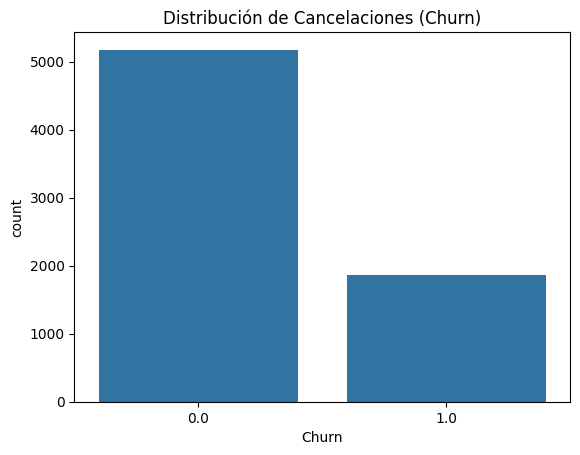

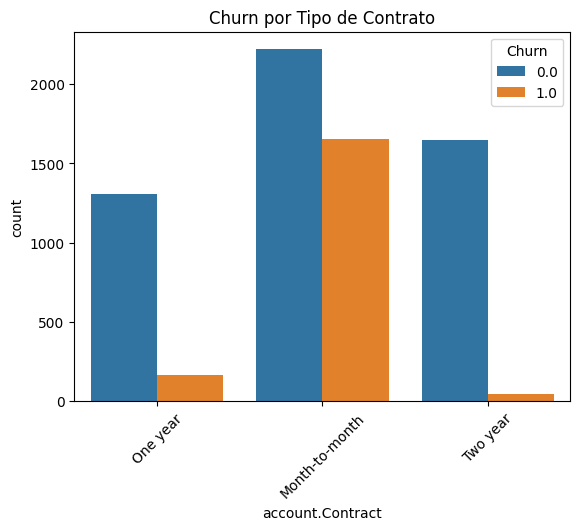

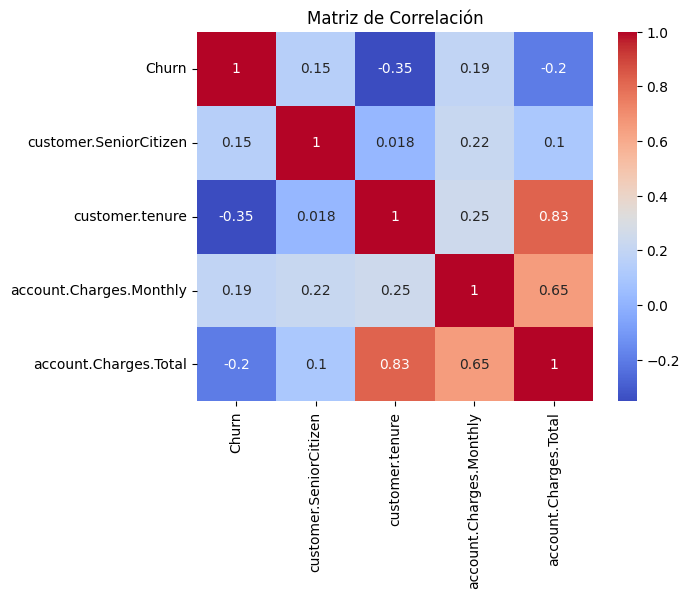

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de churn
sns.countplot(x='Churn', data=df)
plt.title("Distribución de Cancelaciones (Churn)")
plt.show()

# Churn por tipo de contrato
sns.countplot(x='account.Contract', hue='Churn', data=df)
plt.title("Churn por Tipo de Contrato")
plt.xticks(rotation=45)
plt.show()

# Correlación entre variables numéricas
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()
